In [1]:
#Paqueterias
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt




In [2]:
#carga de datos
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#datos de entrenamiento
train_data_e= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/deep/BTC_USD_stock_data.csv', index_col='Date', parse_dates=True)
train_data_e = train_data_e[['Close']]
train_data_e.head()

,Close
Date,
2017-01-01,998.325012
2017-01-02,1021.750000
2017-01-03,1043.839966
2017-01-04,1154.729980
2017-01-05,1013.380005


In [5]:
#Limpieza de datos
train_data_e.replace(['---', '               ---', 'NaN', '', ' '], np.nan, inplace=True)
imputer = SimpleImputer(strategy='mean')
train_data_e= pd.DataFrame(imputer.fit_transform(train_data_e), columns=train_data_e.columns, index=train_data_e.index)
train_data_e.head()



,Close
Date,
2017-01-01,998.325012
2017-01-02,1021.750000
2017-01-03,1043.839966
2017-01-04,1154.729980
2017-01-05,1013.380005


In [6]:
#Normalización de datos
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data_e)

#Crear secuencias de temporales
def create_dataset(dataset, look_back=60):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), :]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

X_train, y_train = create_dataset(train_scaled, 60)
train_scaled


array([[0.00305049],
       [0.00337446],
       [0.00367997],
       ...,
       [0.84764663],
       [0.84795743],
       [0.85803967]])

In [17]:
#LSTM
model = Sequential([
    LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.3),
    LSTM(100, return_sequences=False),
    Dense(1)
])
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,301 (473.83 KB)

 Trainable params: 121,301 (473.83 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Entrenar el modelo
history=model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2)


Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 12s 116ms/step - loss: 0.0364 - val_loss: 9.3171e-04
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - loss: 9.6880e-04 - val_loss: 0.0011
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 124ms/step - loss: 7.4682e-04 - val_loss: 7.7562e-04
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - loss: 7.0479e-04 - val_loss: 8.1017e-04
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 122ms/step - loss: 6.2583e-04 - val_loss: 0.0027
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 114ms/step - loss: 5.1147e-04 - val_loss: 0.0011
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - loss: 8.3522e-04 - val_loss: 5.3005e-04
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - loss: 7.7488e-04 - val_loss: 0.0017
Epoch 9/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - loss: 4.8176e-04 - val_loss: 9.9510e-04
Epoch 10/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - loss: 4.7140e-04 - val_loss: 9.7933e-04
Epoch 11/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 105ms/step - loss: 5.6688e-04 - val_

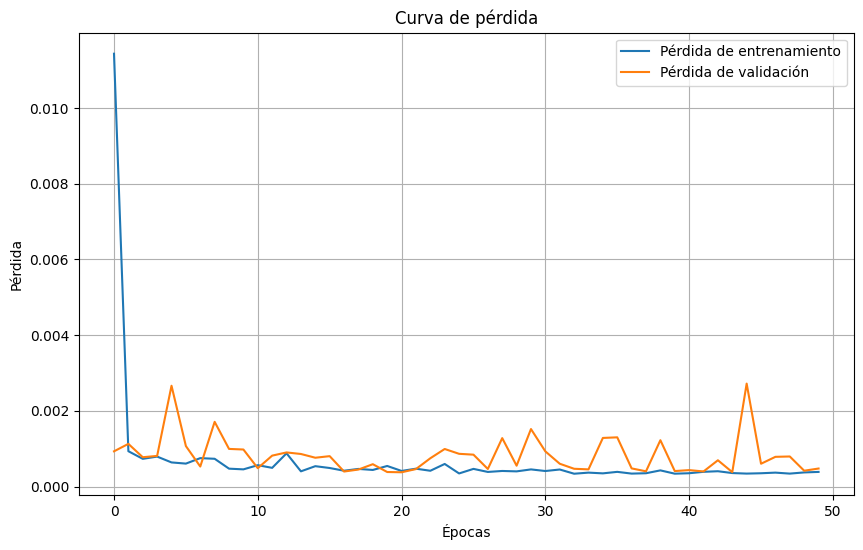

In [20]:
#curva de perdida
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Curva de pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
#datos de pueba para comparación
real_data_2024 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/deep/BTC_USD_stock_data_2024.csv', index_col='Date', parse_dates=True)
real_data_2024= train_data_e[['Close']]
real_data_2024.replace(['---', '               ---', 'NaN', '', ' '], np.nan, inplace=True)
real_data_2024 = pd.DataFrame(imputer.transform(real_data_2024), columns=real_data_2024.columns, index=real_data_2024.index)
real_scaled = scaler.transform(real_data_2024)


In [22]:
# Crear datos de entrada para predicción
X_real, _ = create_dataset(np.vstack([train_scaled[-60:], real_scaled]), 60)

In [23]:
# Predicciones
predictions_scaled = model.predict(X_real)
predictions = scaler.inverse_transform(np.concatenate([predictions_scaled, np.zeros((len(predictions_scaled), 2))], axis=1))[:, 0]

89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step


In [24]:
# Datos reales para comparar
real_btc = scaler.inverse_transform(real_scaled)[:, 0]
real_btc


array([  998.32501221,  1021.75      ,  1043.83996582, ...,
       62067.4765625 , 62089.94921875, 62818.953125  ])

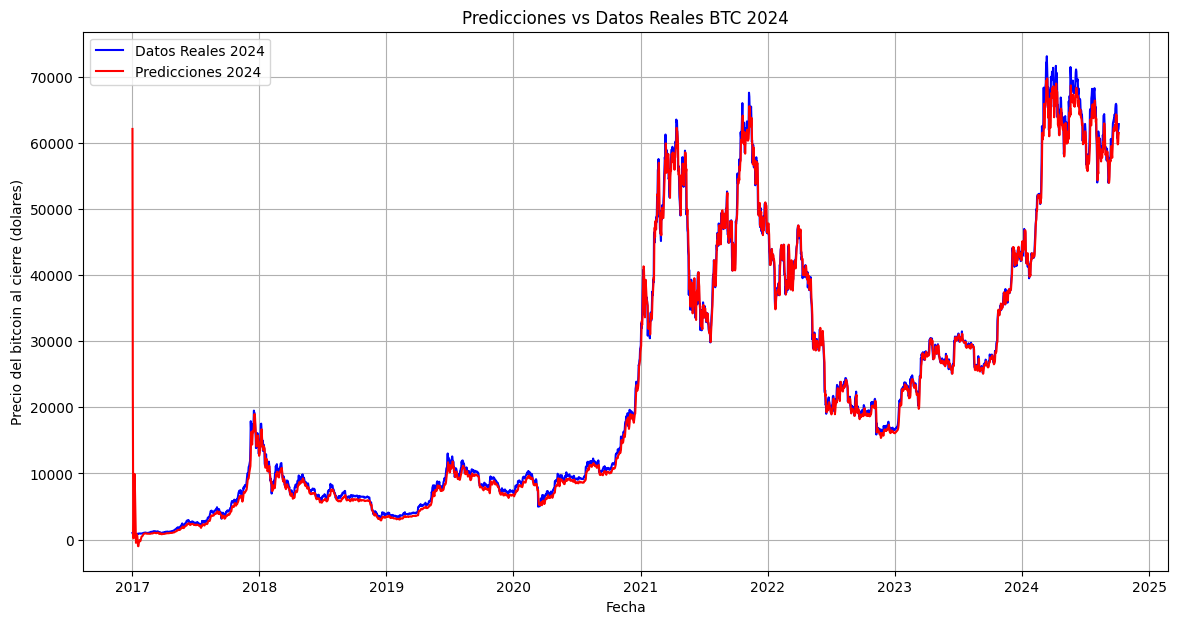

In [25]:

# Graficar
plt.figure(figsize=(14, 7))
plt.plot(real_data_2024.index, real_btc, label='Datos Reales 2024', color='blue')
plt.plot(real_data_2024.index[:len(predictions)], predictions, label='Predicciones 2024', color='red')
plt.title('Predicciones vs Datos Reales BTC 2024')
plt.xlabel('Fecha')
plt.ylabel('Precio del bitcoin al cierre (dolares)')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
import plotly.graph_objects as go
import pandas as pd
from sklearn.metrics import r2_score

# Asegurarse de que tanto 'real_bitcoin' como 'predictions' tienen el mismo índice de tiempo
real_btc = pd.Series(real_btc[:len(predictions)], index=real_data_2024.index[:len(predictions)])
predictions_series = pd.Series(predictions, index=real_data_2024.index[:len(predictions)])

# Crear una lista para almacenar los R-squared de cada mes
r_squared_monthly = []

# Agrupar los datos por mes y calcular el R-squared para cada mes
for month, group in real_btc.groupby(real_btc.index.month):
    # Extraer las predicciones correspondientes para ese mes
    pred_for_month = predictions_series[group.index]

    # Calcular el R-squared
    r_squared = r2_score(group, pred_for_month)

    # Almacenar el resultado
    r_squared_monthly.append((month, r_squared))
    print(f'R-squared para el mes {month}: {r_squared}')

# Crear la figura usando Plotly para una mejor interactividad y presentación
fig = go.Figure()

# Añadir los datos reales a la gráfica
fig.add_trace(go.Scatter(x=real_data_2024.index, y=real_btc, mode='lines', name='Datos Reales 2024', line=dict(color='blue')))

# Añadir las predicciones a la gráfica
fig.add_trace(go.Scatter(x=real_data_2024.index[:len(predictions)], y=predictions, mode='lines', name='Predicciones 2024', line=dict(color='red')))

# Configuración adicional del gráfico
fig.update_layout(
    title='Comparación de Predicciones vs Datos Reales el precio del bitcoin 2024',
    xaxis_title='Fecha',
    yaxis_title='Estimación del costo del bitcoin (dolares)',
    legend_title='Leyenda'
)

# Mostrar la gráfica
fig.show()

# Imprimir los R-squared mensuales
for month, r_squared in r_squared_monthly:
    print(f"R-squared para el mes {month}: {r_squared:.4f}")

R-squared para el mes 1: 0.9243837535178105
R-squared para el mes 2: 0.9956068169339558
R-squared para el mes 3: 0.9958697515588294
R-squared para el mes 4: 0.9974353899855938
R-squared para el mes 5: 0.9954313462283166
R-squared para el mes 6: 0.9965966622003426
R-squared para el mes 7: 0.9970902676407972
R-squared para el mes 8: 0.996893867486104
R-squared para el mes 9: 0.9971312221611484
R-squared para el mes 10: 0.9969436164088885
R-squared para el mes 11: 0.9969526079475161
R-squared para el mes 12: 0.9955953094767288


R-squared para el mes 1: 0.9244
R-squared para el mes 2: 0.9956
R-squared para el mes 3: 0.9959
R-squared para el mes 4: 0.9974
R-squared para el mes 5: 0.9954
R-squared para el mes 6: 0.9966
R-squared para el mes 7: 0.9971
R-squared para el mes 8: 0.9969
R-squared para el mes 9: 0.9971
R-squared para el mes 10: 0.9969
R-squared para el mes 11: 0.9970
R-squared para el mes 12: 0.9956
